# CM4044 Project 2
Machine Learning to Estimate Normal Boiling Point of Hydrocarbons

Presenters: Lee Yuan (U1640404K) and Josefanny Amadea (U1640046K)

# 1. Introduction

In [ ]:
# load the modules from RDKit
# these modules provide the functionalities to calculate molecular descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem.Draw import IPythonConsole
 
# load Pandas to hold data from file
# numpy to handle data
# matplotlib to display data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# machine learning models are trained based on scikit-learn package
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF
from sklearn.neighbors import KNeighborsRegressor

## Read data from file

In [ ]:
#read data from file
data = pd.read_csv('Compiled3.csv', sep=',',dtype={'Name': object, 'SMILES strings': str, 'T_publ (K)': object})
data

,No.,Name,SMILES strings,T_calc (K),T_publ (K),T_pred M-235 (K),T_pred M-20 (K),Absolute Error M-235 (K),Absolute Error M-20 (K),Relative Error M-235 (%),Relative Error M-20 (%)
0,1,ethane,CC,NaN,184.6,184.6,184.9,-0.1,-0.3,0.0,-0.2
1,2,propane,CCC,NaN,231.1,230.7,230.9,0.3,0.1,0.1,0.1
2,3,n-butane,CCCC,NaN,272.7,270.4,270.4,2.2,2.2,0.8,0.8
3,4,n-pentane,CCCCC,NaN,309.2,307.1,306.7,2.1,2.5,0.7,0.8
4,5,n-hexane,CCCCCC,NaN,341.9,339.0,338.4,2.9,3.5,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
250,251,"1,5-cyclooctadiene",C1=CCCC=CCC1,409.9,423.3,415.7,414.6,-5.8,-4.7,-1.4,1.1
251,252,"2,5-dimethyl-1,5-hexadiene",CC(=C)CCC(C)=C,NaN,387.4,380.8,383.2,6.6,4.2,1.7,1.1
252,253,c-1-propenylbenzene,C=CCC1=CC=CC=C1,441.9,452,436.9,434.5,5.0,7.4,1.1,1.7
253,254,1-phenylnaphtalene,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC=C1,621.0,607.1,643.6,634.0,-22.6,-13.0,-3.6,-2.1


In [ ]:
#a function to calculate molecular descriptors for an input mol
def get_fps(mol):
    calc=MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    ds = np.asarray(calc.CalcDescriptors(mol)) 
    arr=Fingerprinter.FingerprintMol(mol)[0]
    
    return ds

In [ ]:
calc=MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
ds = np.asarray(calc.CalcDescriptors(Chem.MolFromSmiles('CC')))
arr=Fingerprinter.FingerprintMol(Chem.MolFromSmiles('CC'))[0]

In [ ]:
len(arr)

79

In [ ]:
len(ds)

200

In [ ]:
all_descs =[x[0] for x in Descriptors._descList]
print(len(all_descs)) # there are 200 molecular descriptors
print(all_descs) #print their names

200
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'T

In [ ]:
#read data from file
data = pd.read_csv('Compiled3.csv', sep=',',dtype={'Name': object, 'SMILES strings': str, 'T_publ (K)': object})
data

,No.,Name,SMILES strings,T_calc (K),T_publ (K),T_pred M-235 (K),T_pred M-20 (K),Absolute Error M-235 (K),Absolute Error M-20 (K),Relative Error M-235 (%),Relative Error M-20 (%)
0,1,ethane,CC,NaN,184.6,184.6,184.9,-0.1,-0.3,0.0,-0.2
1,2,propane,CCC,NaN,231.1,230.7,230.9,0.3,0.1,0.1,0.1
2,3,n-butane,CCCC,NaN,272.7,270.4,270.4,2.2,2.2,0.8,0.8
3,4,n-pentane,CCCCC,NaN,309.2,307.1,306.7,2.1,2.5,0.7,0.8
4,5,n-hexane,CCCCCC,NaN,341.9,339.0,338.4,2.9,3.5,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
250,251,"1,5-cyclooctadiene",C1=CCCC=CCC1,409.9,423.3,415.7,414.6,-5.8,-4.7,-1.4,1.1
251,252,"2,5-dimethyl-1,5-hexadiene",CC(=C)CCC(C)=C,NaN,387.4,380.8,383.2,6.6,4.2,1.7,1.1
252,253,c-1-propenylbenzene,C=CCC1=CC=CC=C1,441.9,452,436.9,434.5,5.0,7.4,1.1,1.7
253,254,1-phenylnaphtalene,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC=C1,621.0,607.1,643.6,634.0,-22.6,-13.0,-3.6,-2.1


## Select columns used for Machine Learning models and create a new dataframe

In [ ]:
published = data.iloc[:,[1,2,4]] #all rows, certain columns
published

,Name,SMILES strings,T_publ (K)
0,ethane,CC,184.6
1,propane,CCC,231.1
2,n-butane,CCCC,272.7
3,n-pentane,CCCCC,309.2
4,n-hexane,CCCCCC,341.9
...,...,...,...
250,"1,5-cyclooctadiene",C1=CCCC=CCC1,423.3
251,"2,5-dimethyl-1,5-hexadiene",CC(=C)CCC(C)=C,387.4
252,c-1-propenylbenzene,C=CCC1=CC=CC=C1,452
253,1-phenylnaphtalene,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC=C1,607.1


In [ ]:
published.columns.values

array(['Name', 'SMILES strings', 'T_publ (K)'], dtype=object)

Convert 'T_publ (K)' objects to float

In [ ]:
#read data from file
published = pd.read_csv('Compiled3.csv', sep=',',dtype={'Name': object, 'SMILES strings': object, 'T_publ (K)':float})
published = data.iloc[:,[1,2,4]] #all rows, certain columns
published


,Name,SMILES strings,T_publ (K)
0,ethane,CC,184.6
1,propane,CCC,231.1
2,n-butane,CCCC,272.7
3,n-pentane,CCCCC,309.2
4,n-hexane,CCCCCC,341.9
...,...,...,...
250,"1,5-cyclooctadiene",C1=CCCC=CCC1,423.3
251,"2,5-dimethyl-1,5-hexadiene",CC(=C)CCC(C)=C,387.4
252,c-1-propenylbenzene,C=CCC1=CC=CC=C1,452
253,1-phenylnaphtalene,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC=C1,607.1


### Calculate the molecules descriptors and append them to the data object.

In [ ]:
# calculate the molecules descriptors and append them to the data object
#data['SMILES strings'] = data['SMILES strings'].astype('str')
published['Mol'] = published['SMILES strings'].apply(Chem.MolFromSmiles)
published['Descriptors'] = published['Mol'].apply(get_fps)

print(published.columns.values)

published.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['Name' 'SMILES strings' 'T_publ (K)' 'Mol' 'Descriptors']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,SMILES strings,T_publ (K),Mol,Descriptors
0,ethane,CC,184.6,<rdkit.Chem.rdchem.Mol object at 0x7fccb1103850>,"[2.0, 2.0, 2.0, 2.0, 0.3727855551576051, 30.07..."
1,propane,CCC,231.1,<rdkit.Chem.rdchem.Mol object at 0x7fccb1103bc0>,"[2.125, 1.25, 2.125, 1.25, 0.3854706587740357,..."
2,n-butane,CCCC,272.7,<rdkit.Chem.rdchem.Mol object at 0x7fccb11089e0>,"[2.1805555555555554, 1.3194444444444444, 2.180..."
3,n-pentane,CCCCC,309.2,<rdkit.Chem.rdchem.Mol object at 0x7fccb11084e0>,"[2.2118055555555554, 1.34375, 2.21180555555555..."
4,n-hexane,CCCCCC,341.9,<rdkit.Chem.rdchem.Mol object at 0x7fccb1108f30>,"[2.2318055555555554, 1.355, 2.2318055555555554..."


In [ ]:
published['Descriptors'].iloc[0].shape

(200,)

In [ ]:
data['SMILES strings'] = str(data['SMILES strings'])

# Data Fitting

In [ ]:
# convert into data in numpy array

X = np.array(list(published['Descriptors']))
y = published['T_publ (K)'].to_numpy().astype(float)

# the training features are pre-processed to zero mean and unit variance
st = StandardScaler()

# X = st.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)

# Machine Learning 1: Lasso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
model = LassoCV(cv=5).fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2149.507719781621, tolerance: 381.42086611518323
  positive)


In [ ]:
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5

#s = np.std(y_test -y_pred)
print ("Lasso TEST RMS", rms)
print()
print ("Lasso TEST r^2 score",r2_score(y_test,y_pred))

Lasso TEST RMS 25.760750149817827

Lasso TEST r^2 score 0.9646821269872679


In [ ]:
y_pred_train = model.predict(X_train)
rms = (np.mean((y_train - y_pred_train) ** 2)) ** 0.5

print ("Lasso TRAIN RMS", rms)
print()
print ("Lasso TRAIN r^2 score",r2_score(y_train,y_pred_train))

Lasso TRAIN RMS 14.443183287581066

Lasso TRAIN r^2 score 0.9895538859186608


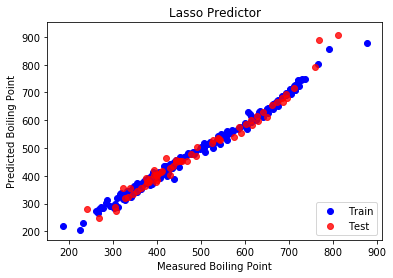

In [ ]:
plt.scatter(y_train.astype(float), y_pred_train.astype(float), label = 'Train', c='blue')
plt.title('Lasso Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.scatter(y_test.astype(float), y_pred.astype(float),c='Red', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('Lasso Predictor.png', dpi=300)
plt.show()

In [ ]:
print(X.shape) #Number of features/descriptors = columns 

(255, 200)


In [ ]:
#Calculate the number of molecular descriptors and list down all of them.
all_descs =[x[0] for x in Descriptors._descList]
print(len(all_descs)) # there are 200 molecular descriptors
print(all_descs) #print their names

200
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'T

In [ ]:
features_used = (model.coef_ != 0) * (np.arange(len(model.coef_)))
features_used = list(set(features_used))
features_used = features_used[1:]
features_used.sort()

In [ ]:
print(features_used)

[1, 3, 4, 5, 6, 10, 11, 13, 14, 16, 17, 18, 20, 22, 27, 28, 29, 30, 32, 35, 46, 48, 49, 66, 77, 78, 81, 82, 88, 89, 91, 93, 95, 99, 102, 104, 109, 111, 145, 149, 151, 198]


In [ ]:
print(model.coef_)

[ 1.05319949e+01 -4.74534327e+00  0.00000000e+00 -5.31177196e-13
  2.34349277e+00  6.56018692e+01  3.68850996e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.61807270e+00 -3.70889426e+00
  0.00000000e+00 -6.71935993e+00 -4.49366758e+01 -0.00000000e+00
  2.57037613e+01  4.79073582e+00 -2.65042980e+01  0.00000000e+00
  2.14634215e+00  0.00000000e+00  9.19231746e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.09907297e+01
  1.06934822e-13  3.26651425e+01  1.59137392e-12 -0.00000000e+00
 -8.31287077e+00  0.00000000e+00  0.00000000e+00  4.77512355e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.83375699e+00  0.00000000e+00
  1.08744777e+00 -9.69803766e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
features_used

[1,
 3,
 4,
 5,
 6,
 10,
 11,
 13,
 14,
 16,
 17,
 18,
 20,
 22,
 27,
 28,
 29,
 30,
 32,
 35,
 46,
 48,
 49,
 66,
 77,
 78,
 81,
 82,
 88,
 89,
 91,
 93,
 95,
 99,
 102,
 104,
 109,
 111,
 145,
 149,
 151,
 198]

In [ ]:
test = np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]])

In [ ]:
test[:,[0,2]]

array([[1, 3],
       [4, 6],
       [7, 9]])

In [ ]:
X_trimmed = X[:, features_used]

# Machine Learning Model 2: Random Forest

In [ ]:
# Use random forest model to train the data
rf = RandomForestRegressor(n_estimators=100, oob_score=True, max_features='auto')
rf.fit(X_train, y_train)
 
y_pred = rf.predict(X_test)
rms = (np.mean((y_test - y_pred)**2))**0.5
print ("Random Forest TEST RMS", rms)
print()
print ("Random Forest TEST r^2 score",r2_score(y_test,y_pred))

Random Forest TEST RMS 8.723939317724062

Random Forest TEST r^2 score 0.9959495544175134


In [ ]:
y_pred = rf.predict(X_train)
rms = (np.mean((y_train - y_pred)**2))**0.5
print ("Random Forest TRAIN RMS", rms)
print()
print ("Random Forest TRAIN r^2 score",r2_score(y_train,y_pred_train))

Random Forest TRAIN RMS 6.151682208893975

Random Forest TRAIN r^2 score 0.9895538859186608


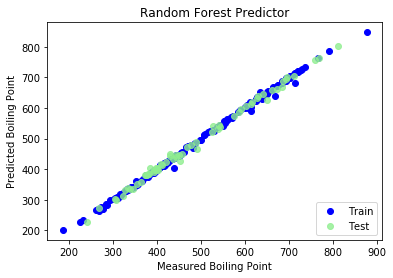

In [ ]:
plt.scatter(y_train,rf.predict(X_train), label = 'Train', c='blue')
plt.title('Random Forest Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.scatter(y_test,rf.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('RF Predictor.png', dpi=300)
plt.show()

# Machine Learning 3: Linear Regression

In [ ]:
#IMPORTS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


LR = LinearRegression()
LR.fit(X_train, y_train)
 
y_pred = LR.predict(X_test)
rms = (np.mean((y_test - y_pred)**2))**0.5
print ("LR TEST RMS", rms)
print()
print ("LR TEST r^2 score",r2_score(y_test,y_pred))

LR TEST RMS 34.5596334185518

LR TEST r^2 score 0.9364353318384361


In [ ]:
y_pred

array([430.39684858, 397.94690359, 525.53712526, 669.74696121,
       284.47420362, 425.15688105, 621.69910184, 696.81411597,
       454.31524233, 783.88763202, 320.12272595, 629.53166642,
       471.73976749, 447.27698104, 507.56072737, 475.07202332,
       580.55658653, 553.39952967, 523.5967491 , 676.98263346,
       515.10413079, 610.86224355, 381.22142545, 476.60150477,
       873.88709655, 315.60865243, 470.35587921, 489.63372387,
       470.732119  , 663.24932167, 390.77135828, 539.75480224,
       381.23980392, 713.62724472, 457.26700934, 689.72131423,
       243.0112648 , 597.03595694, 426.26289289, 271.55852115,
       538.27154019, 412.77400196, 635.78199143, 327.26752628,
       349.84695785, 383.67851632, 568.43591807, 372.10550231,
       681.69170277, 608.94807511, 412.77400196, 319.33202649,
       399.36253174, 862.83524759, 369.86147187, 434.82509524,
       631.83331023, 345.09136008, 297.77457331, 356.06492975,
       595.63830773, 416.35587013, 433.16045937, 398.76

In [ ]:
y_test

array([411.5, 398.8, 526.2, 673.2, 307.2, 409.3, 627. , 693.1, 469. ,
       758.8, 353.5, 442.3, 456.9, 435.2, 429.3, 419.3, 586.4, 575.3,
       524.3, 685.4, 491.1, 629.7, 337.8, 476. , 812.7, 327. , 452. ,
       543.1, 489.4, 661.9, 383.8, 541.5, 376.6, 710.9, 450.3, 695.3,
       266.9, 616.9, 428.9, 240.4, 537.5, 397.5, 649. , 345.9, 362.9,
       399.7, 589.9, 397.2, 683.2, 614.4, 392.5, 333.4, 374.1, 769. ,
       382.3, 442.5, 640.4, 322.4, 304.3, 372.4, 601.7, 402.9, 393.1,
       378.1])

In [ ]:
y_pred_train = LR.predict(X_train)
rms = (np.mean((y_train - y_pred_train)**2))**0.5
print ("LR TRAIN RMS", rms)
print()
print ("LR TRAIN r^2 score",r2_score(y_train,y_pred_train))

LR TRAIN RMS 11.734757932303548

LR TRAIN r^2 score 0.9931043185654028


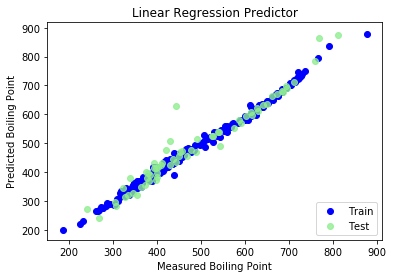

In [ ]:
plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
plt.title('Linear Regression Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.scatter(y_test,y_pred,c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('LR Predictor.png', dpi=300)
plt.show()

Overfitting due to the linear regression formula y= B0X0 + B1X1 + ...
2 y_pred (test) values have negative predicted boiling points

In [ ]:
# To check the data fitting of LR model, 2 negative values are removed.

In [ ]:
np.where(y_pred < 0)[0]

array([], dtype=int64)

In [ ]:
y_newpred = np.delete(y_pred, [11,39])

In [ ]:
y_newpred

array([430.39684858, 397.94690359, 525.53712526, 669.74696121,
       284.47420362, 425.15688105, 621.69910184, 696.81411597,
       454.31524233, 783.88763202, 320.12272595, 471.73976749,
       447.27698104, 507.56072737, 475.07202332, 580.55658653,
       553.39952967, 523.5967491 , 676.98263346, 515.10413079,
       610.86224355, 381.22142545, 476.60150477, 873.88709655,
       315.60865243, 470.35587921, 489.63372387, 470.732119  ,
       663.24932167, 390.77135828, 539.75480224, 381.23980392,
       713.62724472, 457.26700934, 689.72131423, 243.0112648 ,
       597.03595694, 426.26289289, 538.27154019, 412.77400196,
       635.78199143, 327.26752628, 349.84695785, 383.67851632,
       568.43591807, 372.10550231, 681.69170277, 608.94807511,
       412.77400196, 319.33202649, 399.36253174, 862.83524759,
       369.86147187, 434.82509524, 631.83331023, 345.09136008,
       297.77457331, 356.06492975, 595.63830773, 416.35587013,
       433.16045937, 398.76960431])

In [ ]:
y_newtest = np.delete(y_test, [11,39])

In [ ]:
y_newtest

array([411.5, 398.8, 526.2, 673.2, 307.2, 409.3, 627. , 693.1, 469. ,
       758.8, 353.5, 456.9, 435.2, 429.3, 419.3, 586.4, 575.3, 524.3,
       685.4, 491.1, 629.7, 337.8, 476. , 812.7, 327. , 452. , 543.1,
       489.4, 661.9, 383.8, 541.5, 376.6, 710.9, 450.3, 695.3, 266.9,
       616.9, 428.9, 537.5, 397.5, 649. , 345.9, 362.9, 399.7, 589.9,
       397.2, 683.2, 614.4, 392.5, 333.4, 374.1, 769. , 382.3, 442.5,
       640.4, 322.4, 304.3, 372.4, 601.7, 402.9, 393.1, 378.1])

In [ ]:
rms = (np.mean((y_newtest - y_newpred)**2))**0.5
print ("LR TEST RMS", rms)
print()
print ("LR TEST r^2 score",r2_score(y_newtest,y_newpred))

LR TEST RMS 25.530822112311476

LR TEST r^2 score 0.9644896738644626


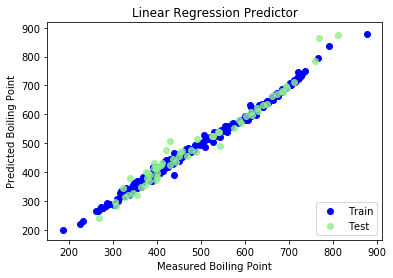

In [ ]:
plt.scatter(y_train,y_pred_train, label = 'Train', c='blue')
plt.title('Linear Regression Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.scatter(y_newtest,y_newpred,c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('LR Predictor.png', dpi=300)
plt.show()

# Machine Learning 4: K Nearest Neighbour#

In [ ]:
KR = KNeighborsRegressor()
KR.fit(X_train, y_train)
 
y_pred = KR.predict(X_test)
rms = (np.mean((y_test - y_pred)**2))**0.5
print ("KR TEST RMS", rms)
print()
print ("KRTTEST r^2 score",r2_score(y_test,y_pred))

KR TEST RMS 32.09274489662734

KRTTEST r^2 score 0.9451860300153182


In [ ]:
y_pred_train = KR.predict(X_train)
rms = (np.mean((y_train - y_pred_train)**2))**0.5
print ("KR TRAIN RMS", rms)
print()
print ("KR TRAIN r^2 score",r2_score(y_train,y_pred_train))

KR TRAIN RMS 28.9201542434678

KR TRAIN r^2 score 0.9581177380180982


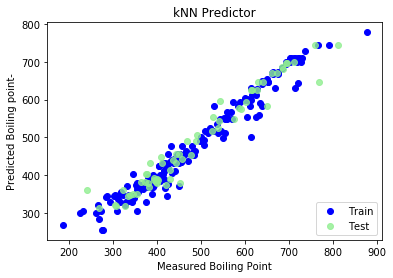

In [ ]:
plt.scatter(y_train.astype(float), KR.predict(X_train).astype(float), label = 'Train', c='blue')
plt.title('kNN Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling point-')
plt.scatter(y_test,KR.predict(X_test).astype(float),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('kNN Predictor.png', dpi=300)
plt.show()

# Machine Learning 5: Support Vector Machine#

In [ ]:
#IMPORTS
from sklearn.svm import SVR

svr2 = SVR(kernel = 'linear', gamma='scale', epsilon=10)

svr2.fit(X_train, y_train)
y_pred = svr2.predict(X_test)
rms = (np.mean((y_test - y_pred)**2))**0.5
print ("SVR TEST RMS", rms)
print()
print ("SVR TEST r^2 score",r2_score(y_test,y_pred))

SVR TEST RMS 28.98361035776511

SVR TEST r^2 score 0.9552922828154657


In [ ]:
y_pred_train = svr2.predict(X_train)
rms = (np.mean((y_train - y_pred_train)**2))**0.5
print ("SVM TRAIN RMS", rms)
print()
print ("SVM TRAIN r^2 score",r2_score(y_train,y_pred_train))

SVM TRAIN RMS 19.426775019013036

SVM TRAIN r^2 score 0.9811013692110522


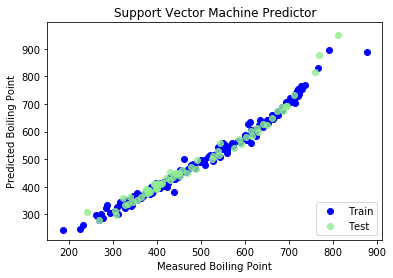

In [ ]:
plt.scatter(y_train,svr2.predict(X_train), label = 'Train', c='blue')
plt.title('Support Vector Machine Predictor')
plt.xlabel('Measured Boiling Point')
plt.ylabel('Predicted Boiling Point')
plt.scatter(y_test,svr2.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('SVM Predictor.png', dpi=300)

### Summary of r^2 values and RMS values of all 5 Machine Learning Models

In [ ]:
summary = {'Machine Learning Model':['Lasso Regression','Random Forest','Linear Regression','K Nearest Neighbour','Support Vector Machine'],'RMS values':[0.964300908706161,8.616352662138313,29897537216406.742,32.81887109575831, 28.971783138275214],'r^2 values':[0.964300908706161, 0.9960488414071232,-4.757166589493432e+22,0.942677541843366,0.9553287627495698]} 

# Create DataFrame 
df = pd.DataFrame(summary) 
  
# Print the output. 
df

,Machine Learning Model,RMS values,r^2 values
0,Lasso Regression,9.643009e-01,9.643009e-01
1,Random Forest,8.616353e+00,9.960488e-01
2,Linear Regression,2.989754e+13,-4.757167e+22
3,K Nearest Neighbour,3.281887e+01,9.426775e-01
4,Support Vector Machine,2.897178e+01,9.553288e-01


Random Forest Model which has the highest r^2 value will be used for the prediction of normal boiling points.

# Upload new data

In [ ]:
excel_file = 'testingmolecules.csv'
newdata = pd.read_csv(excel_file,sep=',')
newdata

,No.,Name,SMILES strings,T_publ (K)
0,1,"2,6-dimethylheptadecane",CCCCCCCCCCCC(C)CCCC(C)C,864.1
1,2,3-ethyltoluene,CCC1=CC=CC(C)=C1,434.3
2,3,"Dibenzo[a,e]pyrene",C1=CC2=C(C=C1)C1=CC=C3C=CC=C4C5=C(C=CC=C5)C(=C...,825.3
3,4,"2,6,10-trimethylpentadecane",CCCCCC(C)CCCC(C)CCCC(C)C,571.2
4,5,1-methylnaphtalene,CC1=C2C=CC=CC2=CC=C1,515.8
5,6,2-methylnaphthalene,CC1=CC=C2C=CC=CC2=C1,514.1
6,7,"1,5-Octadiyne",CCC#CCCC#C,419.4
7,8,ethyne,C#C,189.0
8,9,"2,6,10,14-Tetramethylpentadecane",CC(C)CCCC(C)CCCC(C)CCCC(C)C,569.0
9,10,hopane,CC(C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C...,730.4


In [ ]:
# calculate the molecules descriptors and append them to the data object
#data['SMILES strings'] = data['SMILES strings'].astype('str')
newdata['Mol'] = newdata['SMILES strings'].apply(Chem.MolFromSmiles)
newdata['Descriptors'] = newdata['Mol'].apply(get_fps)

print(newdata.columns.values)

newdata

['No.' 'Name' 'SMILES strings' 'T_publ (K)' 'Mol' 'Descriptors']


,No.,Name,SMILES strings,T_publ (K),Mol,Descriptors
0,1,"2,6-dimethylheptadecane",CCCCCCCCCCCC(C)CCCC(C)C,864.1,<rdkit.Chem.rdchem.Mol object at 0x7fccb0e603f0>,"[2.449479059951192, 0.8888039342406502, 2.4494..."
1,2,3-ethyltoluene,CCC1=CC=CC(C)=C1,434.3,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94210>,"[2.2222222222222223, 1.1405555555555555, 2.222..."
2,3,"Dibenzo[a,e]pyrene",C1=CC2=C(C=C1)C1=CC=C3C=CC=C4C5=C(C=CC=C5)C(=C...,825.3,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d944e0>,"[2.3669444444444445, 1.3134575774754347, 2.366..."
3,4,"2,6,10-trimethylpentadecane",CCCCCC(C)CCCC(C)CCCC(C)C,571.2,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94940>,"[2.4465042359536406, 0.8849887677419519, 2.446..."
4,5,1-methylnaphtalene,CC1=C2C=CC=CC2=CC=C1,515.8,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94670>,"[2.1574074074074074, 1.326388888888889, 2.1574..."
5,6,2-methylnaphthalene,CC1=CC=C2C=CC=CC2=C1,514.1,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94080>,"[2.2037037037037037, 1.3176851851851854, 2.203..."
6,7,"1,5-Octadiyne",CCC#CCCC#C,419.4,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94e40>,"[4.9929648526077095, 0.7847222222222222, 4.992..."
7,8,ethyne,C#C,189.0,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94350>,"[4.0, 4.0, 4.0, 4.0, 0.3329262983047797, 26.03..."
8,9,"2,6,10,14-Tetramethylpentadecane",CC(C)CCCC(C)CCCC(C)CCCC(C)C,569.0,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94710>,"[2.4481709026203076, 0.8825736004916198, 2.448..."
9,10,hopane,CC(C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C...,730.4,<rdkit.Chem.rdchem.Mol object at 0x7fccb0d94170>,"[2.8111642573696143, 0.5611717156317175, 2.811..."


## Identify all the molecular descriptors used in Random Forest Model

In [ ]:
features_used = (model.coef_ != 0) * (np.arange(len(model.coef_)))
features_used = list(set(features_used))
features_used = features_used[1:]
features_used.sort()
print(features_used)

[1, 3, 4, 5, 6, 10, 11, 13, 14, 16, 17, 18, 20, 22, 27, 28, 29, 30, 32, 35, 46, 48, 49, 66, 77, 78, 81, 82, 88, 89, 91, 93, 95, 99, 102, 104, 109, 111, 145, 149, 151, 198]


In [ ]:
# Prove that the oth molecular descriptor is not taken into account in this model.
model.coef_ < 0

array([False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
features2 = np.where(model.coef_!=0)[0]

In [ ]:
features2.shape

(43,)

In [ ]:
data = {"Descriptors":(all_descs)}
MolecularDescriptors = pd.DataFrame(data)
MolecularDescriptors

,Descriptors
0,MaxEStateIndex
1,MinEStateIndex
2,MaxAbsEStateIndex
3,MinAbsEStateIndex
4,qed
...,...
195,fr_thiazole
196,fr_thiocyan
197,fr_thiophene
198,fr_unbrch_alkane


In [ ]:
MolecularDescriptors_dataframe = MolecularDescriptors.iloc[features2]
MolecularDescriptors_dataframe
selectedMD_list = MolecularDescriptors_dataframe["Descriptors"].tolist()
selectedMD_list

['MaxEStateIndex',
 'MinEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0n',
 'Chi1',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'Ipc',
 'Kappa3',
 'PEOE_VSA5',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SlogP_VSA3',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA6',
 'EState_VSA7',
 'VSA_EState3',
 'VSA_EState4',
 'VSA_EState6',
 'VSA_EState8',
 'FractionCSP3',
 'NumAliphaticCarbocycles',
 'NumAromaticCarbocycles',
 'NumAromaticRings',
 'NumSaturatedCarbocycles',
 'NumSaturatedRings',
 'fr_aryl_methyl',
 'fr_benzene',
 'fr_bicyclic',
 'fr_unbrch_alkane']

In [ ]:
len(selectedMD_list)

43

# Random Forest Regression

## Data Fitting

In [ ]:
X_train = np.array(list(published['Descriptors']))
X_test = np.array(list(newdata['Descriptors']))
y_train = published['T_publ (K)'].to_numpy().astype(float)
#y_test = newdata['T_publ (K)'].to_numpy().astype(float)

st = StandardScaler()
st.fit(X_train)
st.fit(X_test)
X_train = st.transform(X_train)
X_test = st.transform(X_test)

In [ ]:
rf2= RandomForestRegressor(n_estimators=100, oob_score=True, max_features='auto')
rf2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

## Prediction of the boiling points for the 10 molecules

In [ ]:
y_pred = rf2.predict(X_test)
print(y_pred)

[606.052      434.85618333 673.143      586.006      481.999
 482.181      404.5285     212.299      603.102      729.649     ]


In [ ]:
y_test

array([411.5, 398.8, 526.2, 673.2, 307.2, 409.3, 627. , 693.1, 469. ,
       758.8, 353.5, 442.3, 456.9, 435.2, 429.3, 419.3, 586.4, 575.3,
       524.3, 685.4, 491.1, 629.7, 337.8, 476. , 812.7, 327. , 452. ,
       543.1, 489.4, 661.9, 383.8, 541.5, 376.6, 710.9, 450.3, 695.3,
       266.9, 616.9, 428.9, 240.4, 537.5, 397.5, 649. , 345.9, 362.9,
       399.7, 589.9, 397.2, 683.2, 614.4, 392.5, 333.4, 374.1, 769. ,
       382.3, 442.5, 640.4, 322.4, 304.3, 372.4, 601.7, 402.9, 393.1,
       378.1])

In [ ]:
X_train = np.array(list(published['Descriptors']))
X_test = np.array(list(newdata['Descriptors']))
y_train = published['T_publ (K)'].to_numpy().astype(float)

st = StandardScaler()
st.fit(X_train)
st.fit(X_test)
X_train = st.transform(X_train)
X_test = st.transform(X_test)

In [ ]:
Descriptors

<module 'rdkit.Chem.Descriptors' from '/opt/conda/lib/python3.7/site-packages/rdkit/Chem/Descriptors.py'>

In [ ]:
rf2.feature_importances_

array([1.00021856e-04, 9.92210434e-05, 5.03170306e-05, 2.24825755e-04,
       1.01443343e-03, 2.66290673e-03, 2.20057415e-03, 2.40163208e-03,
       2.06464609e-03, 0.00000000e+00, 6.41389778e-05, 1.80995925e-04,
       1.12497310e-04, 8.96382551e-05, 7.57595264e-04, 1.27513119e-04,
       2.43403661e-04, 3.66508322e-04, 1.13722406e-03, 1.09671599e-03,
       2.54183964e-03, 1.24233747e-03, 2.23259660e-01, 3.27765426e-03,
       3.30285401e-03, 1.52269842e-03, 2.22314869e-03, 1.08734854e-03,
       9.97600499e-04, 5.27451893e-04, 2.42836361e-04, 2.04956438e-05,
       7.20459768e-01, 8.98956892e-04, 2.15375605e-04, 2.01942923e-04,
       4.17498730e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.04815159e-06, 3.40233320e-04,
       2.39074558e-04, 3.12749122e-07, 0.00000000e+00, 0.00000000e+00,
       1.78851080e-05, 0.00000000e+00, 0.00000000e+00, 8.18087208e-06,
      

In [ ]:
absolute_error = y_pred - newdata['T_publ (K)']
relative_error = (absolute_error / newdata['T_publ (K)'])* 100
error_table = {'Molecule Name':newdata['Name'],'SMILES Strings': newdata['SMILES strings'],'Published BP (K)': newdata['T_publ (K)'],'Predicted BP (K)':y_pred,'Absolute Error (K)':absolute_error, 'Relative Error (%)': relative_error} 

# Create DataFrame 
df_error = pd.DataFrame(error_table) 

# Print the output 
df_error

,Molecule Name,SMILES Strings,Published BP (K),Predicted BP (K),Absolute Error (K),Relative Error (%)
0,"2,6-dimethylheptadecane",CCCCCCCCCCCC(C)CCCC(C)C,864.1,606.052000,-258.048000,-29.863210
1,3-ethyltoluene,CCC1=CC=CC(C)=C1,434.3,434.856183,0.556183,0.128064
2,"Dibenzo[a,e]pyrene",C1=CC2=C(C=C1)C1=CC=C3C=CC=C4C5=C(C=CC=C5)C(=C...,825.3,673.143000,-152.157000,-18.436569
3,"2,6,10-trimethylpentadecane",CCCCCC(C)CCCC(C)CCCC(C)C,571.2,586.006000,14.806000,2.592087
4,1-methylnaphtalene,CC1=C2C=CC=CC2=CC=C1,515.8,481.999000,-33.801000,-6.553121
5,2-methylnaphthalene,CC1=CC=C2C=CC=CC2=C1,514.1,482.181000,-31.919000,-6.208714
6,"1,5-Octadiyne",CCC#CCCC#C,419.4,404.528500,-14.871500,-3.545899
7,ethyne,C#C,189.0,212.299000,23.299000,12.327513
8,"2,6,10,14-Tetramethylpentadecane",CC(C)CCCC(C)CCCC(C)CCCC(C)C,569.0,603.102000,34.102000,5.993322
9,hopane,CC(C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C...,730.4,729.649000,-0.751000,-0.102820


## Molecule Descriptors Calculations

Selected molecular descriptors used in the random forest are numerical values associated with the chemical constitution for correlation of chemical structure with the normal boiling points.

In [ ]:
mol1 = Chem.MolFromSmiles('CCCCCCCCCCCC(C)CCCC(C)C')
mol2 = Chem.MolFromSmiles('CCC1=CC=CC(C)=C1')
mol3 = Chem.MolFromSmiles('C1=CC2=C(C=C1)C1=CC=C3C=CC=C4C5=C(C=CC=C5)C(=C2)C1=C34')
mol4 = Chem.MolFromSmiles('CCCCCC(C)CCCC(C)CCCC(C)C')
mol5 = Chem.MolFromSmiles('CC1=C2C=CC=CC2=CC=C1')
mol6 = Chem.MolFromSmiles('CC1=CC=C2C=CC=CC2=C1')
mol7 = Chem.MolFromSmiles('CCC#CCCC#C')
mol8 = Chem.MolFromSmiles('C#C')
mol9 = Chem.MolFromSmiles('CC(C)CCCC(C)CCCC(C)CCCC(C)C')
mol10 = Chem.MolFromSmiles('CC(C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2CC[C@@H]2[C@@]3(C)CCCC(C)(C)[C@@H]3CC[C@@]12C')

In [ ]:
selectedMD_list

['MaxEStateIndex',
 'MinEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0n',
 'Chi1',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'Ipc',
 'Kappa3',
 'PEOE_VSA5',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SlogP_VSA3',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA6',
 'EState_VSA7',
 'VSA_EState3',
 'VSA_EState4',
 'VSA_EState6',
 'VSA_EState8',
 'FractionCSP3',
 'NumAliphaticCarbocycles',
 'NumAromaticCarbocycles',
 'NumAromaticRings',
 'NumSaturatedCarbocycles',
 'NumSaturatedRings',
 'fr_aryl_methyl',
 'fr_benzene',
 'fr_bicyclic',
 'fr_unbrch_alkane']

## Calculation of Molecular Descriptors of 2-methylnaphthalene (aromatic compound)

In [ ]:
#Calculating Molecular Descriptors of 2-methylnaphthalene
mol6 = Chem.MolFromSmiles('CC1=CC=C2C=CC=CC2=C1')

In [ ]:
selectedMD_list
#initialize the molecular descriptor calculator
calc = MoleculeDescriptors.MolecularDescriptorCalculator(selectedMD_list)

descs_values6=calc.CalcDescriptors(mol6)

print(descs_values6)

(2.2037037037037037, 1.3176851851851854, 1.3176851851851854, 0.5297256591150028, 142.201, 132.12099999999998, -0.018140473974228584, -0.06162970757780919, 0.018140473974228584, 0.8181818181818182, 2.3636363636363638, 2.8289012156206956, 374.45002354254177, 6.5414518843273814, 5.360173345306137, 1.904967731246847, 1.904967731246847, 1.3087426863819094, 1.3087426863819094, 487.8529731213885, 1.1168263318939629, 0.0, 17.696185628620217, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6440740740740747, 1.3228703703703706, 14.915555555555557, 2.1175, 0.09090909090909091, 0, 2, 2, 0, 0, 1, 2, 1, 0)


Based on the results above, molecular descriptor which has the largest value / plays the most significant part in predicting the normal boiling point of 2-methylnaphthalene is BertzCT.

BertzCT: A topological index meant to quantify “complexity” of molecules.
Note that fr_benzene = 2 due to the presence of aromatic structure in 2-methylnaphthalene. There is a correlation between the benzene ring and the predicted boiling point.

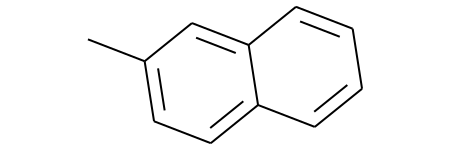

In [ ]:
mol6

## Calculation of Molecular Descriptors of hopane (aliphatic compound)

In [ ]:
#Calculating Molecular Descriptors of hopane
mol10 = Chem.MolFromSmiles('CC(C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2CC[C@@H]2[C@@]3(C)CCCC(C)(C)[C@@H]3CC[C@@]12C')

In [ ]:
selectedMD_list
#initialize the molecular descriptor calculator
calc = MoleculeDescriptors.MolecularDescriptorCalculator(selectedMD_list)

descs_values10 = calc.CalcDescriptors(mol10)

print(descs_values10)

(2.8111642573696143, 0.5611717156317175, 0.5611717156317175, 0.4024753470253005, 412.7460000000003, 360.33000000000015, -0.023538927319912542, -0.06249823690181725, 0.023538927319912542, 0.5666666666666667, 1.8, 1.5191662859548662, 688.1518798246971, 21.74227620818978, 13.901101552495293, 13.618475625301956, 13.618475625301956, 12.131829986818444, 12.131829986818444, 4770627.7393379025, 2.52, 0.0, 126.79060485321237, 0.0, 0.0, 0.0, 27.0749523469839, 0.0, 0.0, 0.0, 2.919528026520271, 0.0, 21.399394264869205, 1.0, 5, 0, 0, 5, 5, 0, 0, 7, 0)


Based on the results above, molecular descriptor which has the largest correlation with predicting the normal boiling point of hopane is Ipc index.

Ipc index: information for polynomial coefficients based information theory.

Note that fr_benzene = 0 due to the absence of benzene ring. Therefore, there is no correlation between the benzene rings and the prediction of boiling point of hopane.

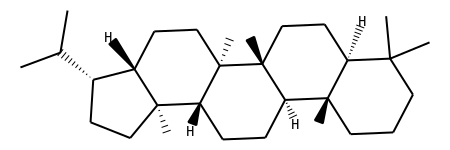

In [ ]:
mol10

## Limitations of machine learning models

Machine learning models do not provide rational reasons to how predictions are made. Predicted boiling points are made by the restricted features, in this case, there are only 200 molecular descriptors.

The bigger the data and the longer it is exposed to these data, the better it will perform. For example, using a system to play games and beat human opponents would require feeding the system with historical data and continuously exposing it to newly acquired data to make better predictions or decisions.



Possible factors to the deviation of the predicted boiling points from experimental ones:
Experimental boiling points usually come in ranges, and hence, there is no fixed boiling point.
The data contains only 255 hydrocarbons. olecules with other elements besides C and H

Limitation of random forest:
Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).

# Conclusion
Based on the comparison of r^2 values among the 5 machine learning models, we have used random forest model to predict normal boiling point of the 10 new molecules. The algorithm describes 43 molecular descriptors and enables us to predict the boiling point, the heat capacity and the vapor pressure as a function of temperature.
We also predicted the boiling point of branched aliphatic chain up to aromatic hydrocarbons.
The number of molecular descriptors correlates to the boiling point.

temperature and pressure dependence of dynamic viscosity
and density alongside interproperty correlations across the
temperature range to predict the kinematic viscosity at atmospheric pressure as a function of temperature. Values
of physical properties reproduced with random forest are more accurate and consistent than the values
reproduced by other methods. We present a summary of
our results for the boiling point, the molar heat capacity,
the Antoine coefficients, the flash point, the melting point
and the kinematic viscosity in Table 6.
Our study serves as a solid platform from which to
further investigate physical properties of alkanes. This
generic neural network architecture could merge sparse
experimental data with molecular dynamics simulations
to predict physical properties of alkanes, particularly the
intractable properties like shear viscosity and density, enabling us to identify the alkanes that could be components
for lubricant base oils with superior physical properties.